# **US Accidents Analysis**

### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

Connect to Local Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Data/Accident.csv')
dataset.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


Determine the shape or structure of the data frame.

In [ ]:
print('Shape: ', dataset.shape)

Shape:  (3513617, 49)


Different datatypes present in our dataset.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) refers to the essential method of undertaking initial data analysis to uncover trends, spot anomalies, evaluate theories, and verify conclusions using summary statistics and graphical representations.

This dataset includes 49 columns, indicating that we are working with a total of 49 features, which is a bit too much. We're going to try to delete some of them and maybe merge a few columns into one.

In this notebook our EDA will consist of following sub sections:

1. Data Visualizations.
2. Handeling Missing Values.

### Data Visualization

At first we will analyze our output feature/Dependent feature i.e. Severity of the accident.

Severity of the accident is a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

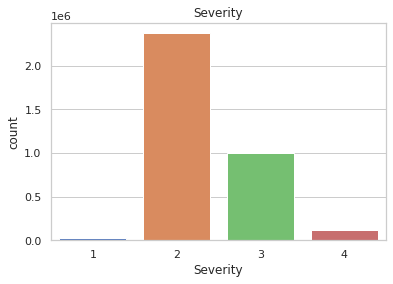

In [ ]:
sns.set(style="whitegrid")
sns.countplot(x=dataset["Severity"], palette="muted")
plt.title("Severity")
plt.show()

Most of our Data Visualizations is peformed on Tableau.

Analysis With respect to 49 States

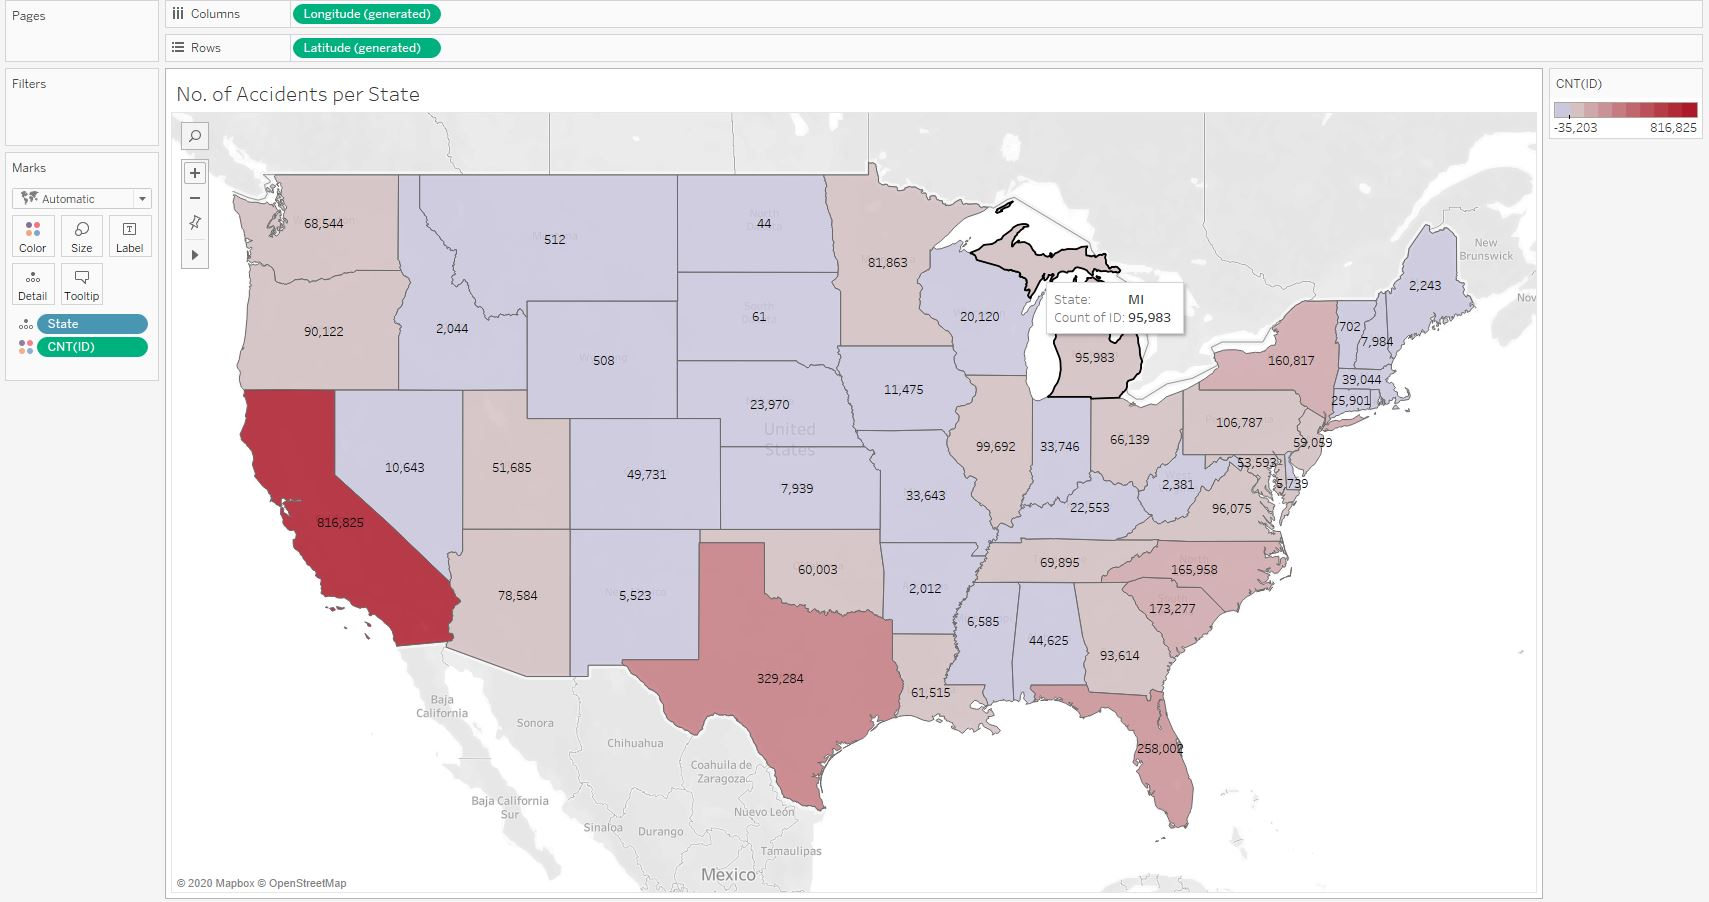

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/no. of accidents per state.JPG')

As evident above, California has the highest number of accident. Followed by Texas.

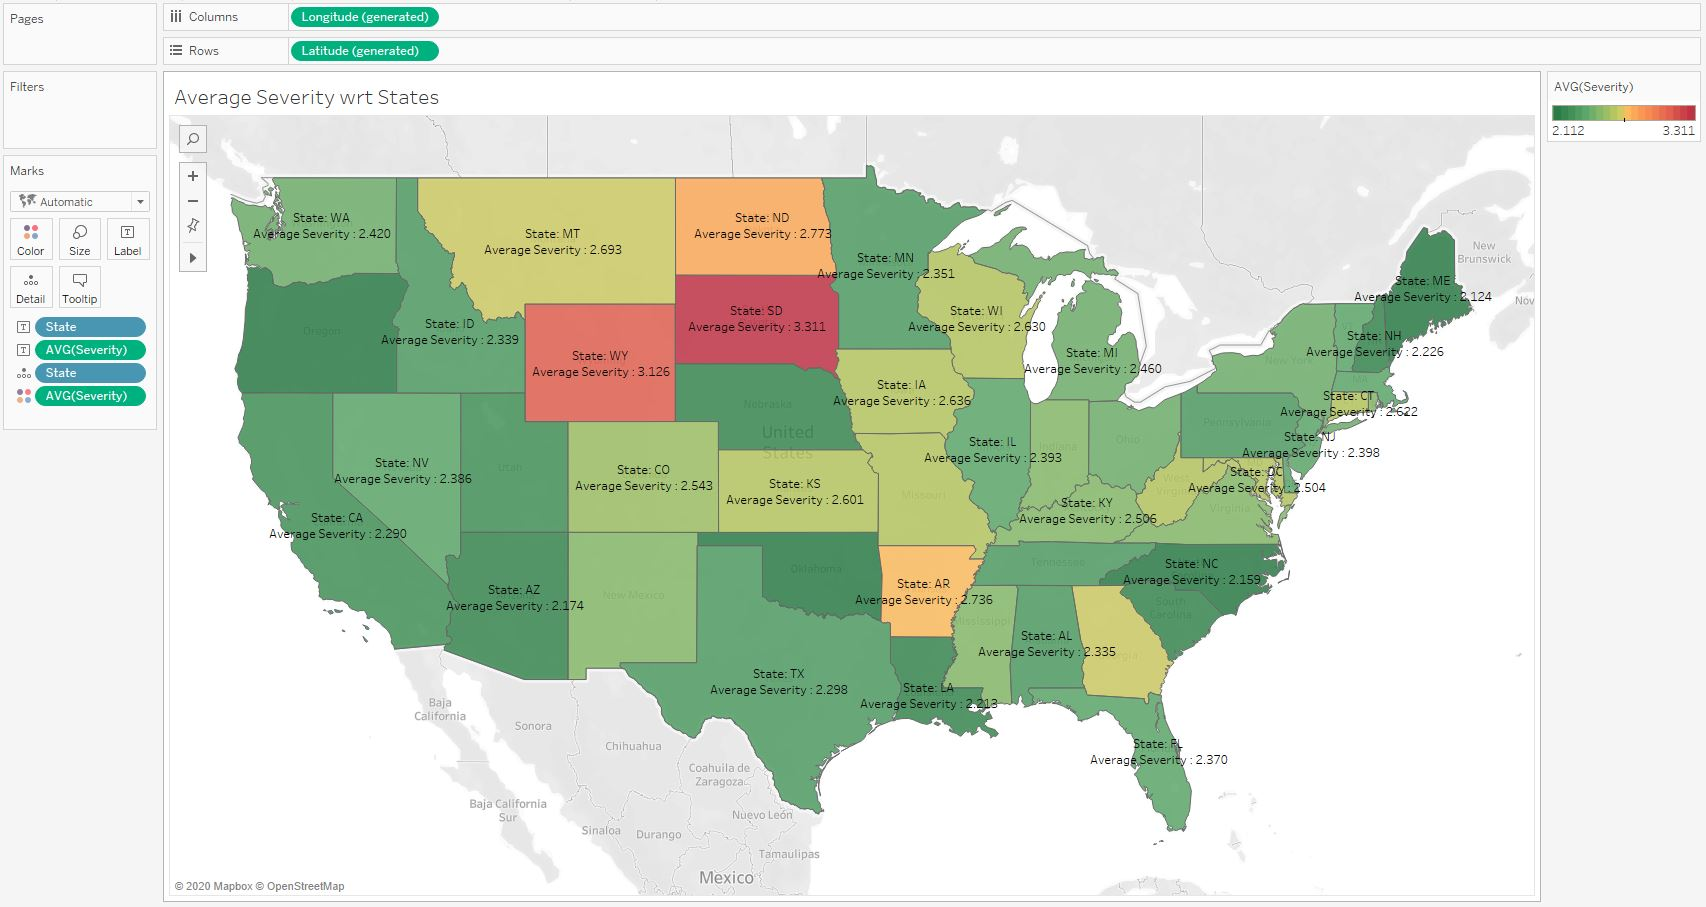

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/AvgSeverity vs State.JPG')

But it was interesting to know that the average severity of the accident in California and Texas is considerably less. The highest Average Severity is observed in South Dakota. This is probably because, in these two states, the population or the number of vehicles is smaller, and there are more mountains, and most of the roads are highways or mountain roads.


Now we will analyze the Number of accidents occured with respect to Time.

For this purpose we have seperated the variable *Start_time* into days, months, year and further into hours and minute.

In [ ]:
accidenttime = dataset.Start_Time.str.split("-",expand=True)
accidenttime = accidenttime.rename(columns={0:"Year",1:"Month",2:"DayTime"})
accidenttime

,Year,Month,DayTime
0,2016,02,08 05:46:00
1,2016,02,08 06:07:59
2,2016,02,08 06:49:27
3,2016,02,08 07:23:34
4,2016,02,08 07:39:07
...,...,...,...
3513612,2019,08,23 18:03:25
3513613,2019,08,23 19:11:30
3513614,2019,08,23 19:00:21
3513615,2019,08,23 19:00:21


In [ ]:
time = accidenttime.DayTime.str.split(":",expand=True)
time = time.rename(columns={0:"Hour",1:"Minute",2:"Second"})
time

,Hour,Minute,Second
0,08 05,46,00
1,08 06,07,59
2,08 06,49,27
3,08 07,23,34
4,08 07,39,07
...,...,...,...
3513612,23 18,03,25
3513613,23 19,11,30
3513614,23 19,00,21
3513615,23 19,00,21


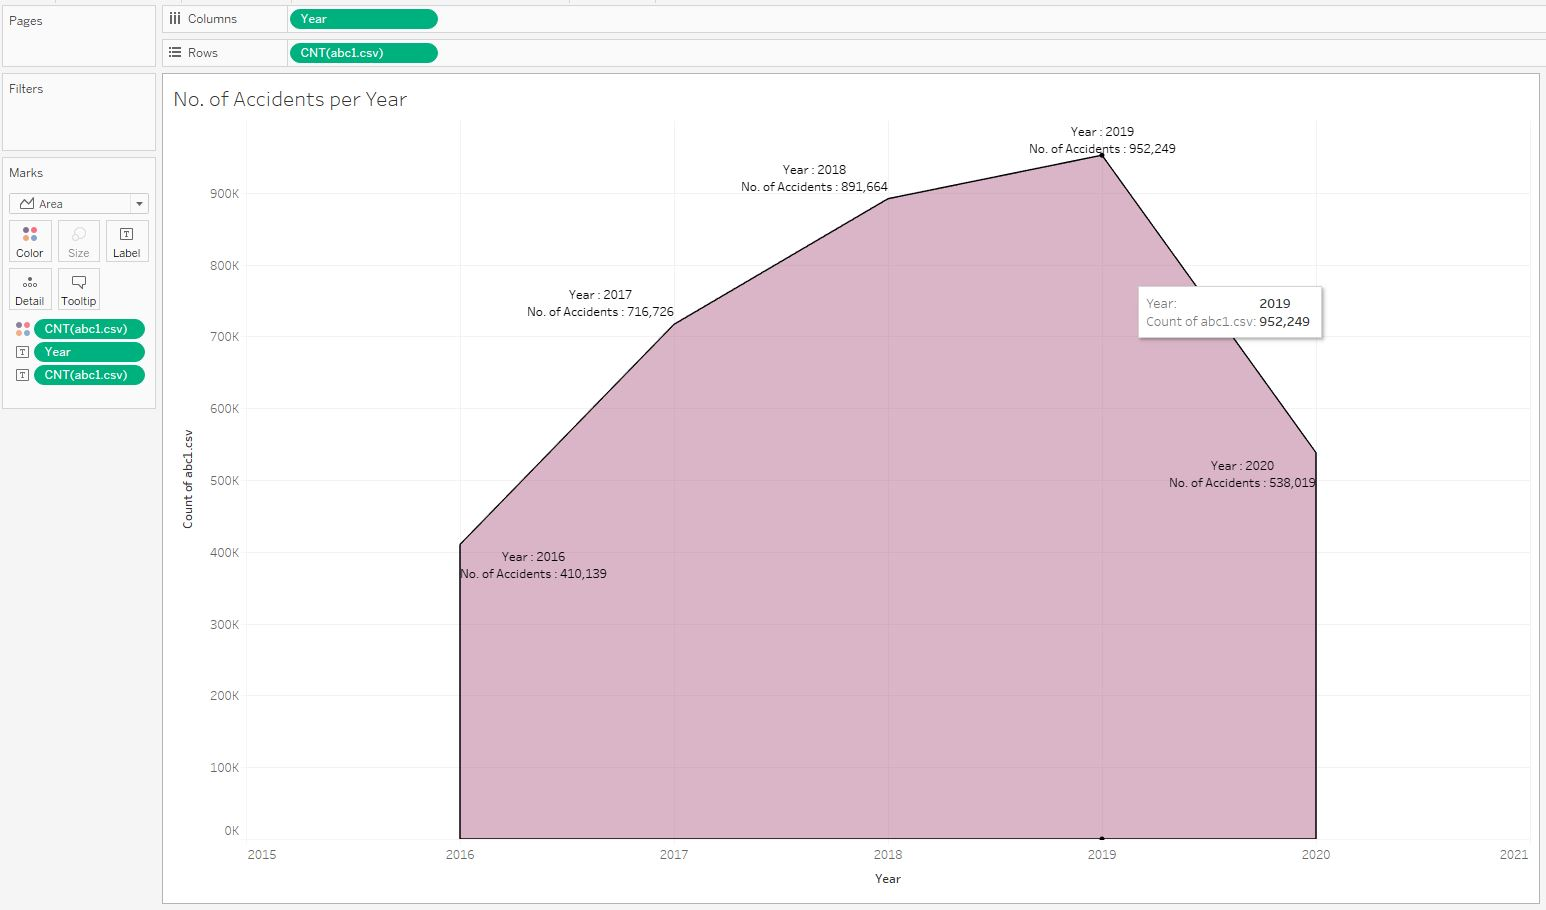

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/No of accidents per Year.JPG')

As we can see above the number of accidents was gradually increasing from year 2016 to 2019 and after that there was a downfall in the no. of accident. We can assume people have better awareness regarding their safety. Infrastructure development and traffic education also contribute to a decrease in the number of accidents.

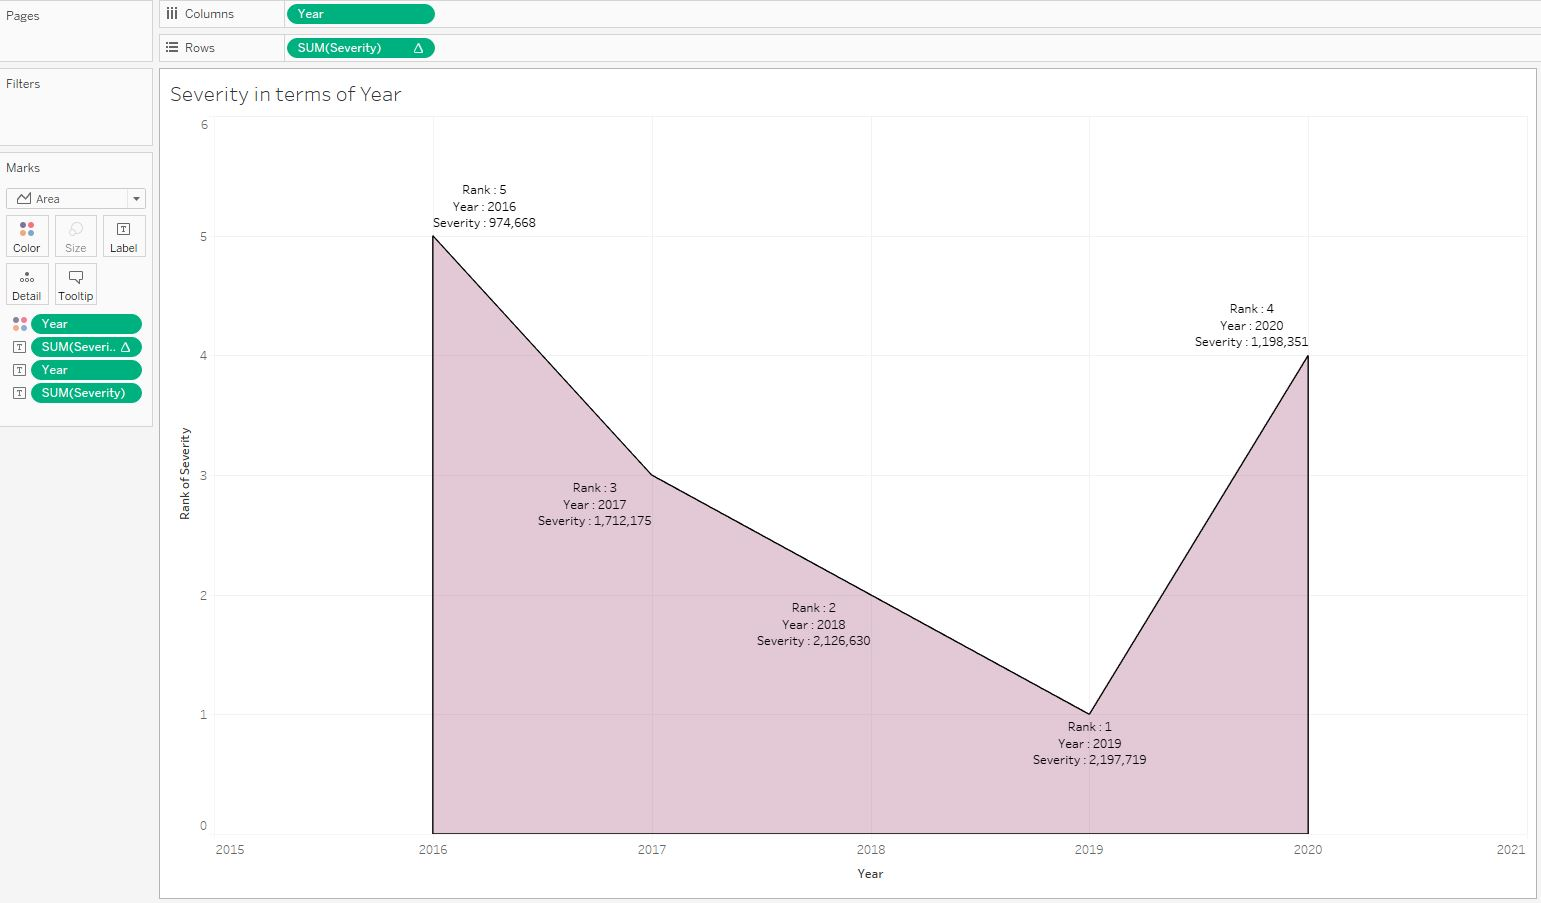

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/Severity vs Year.JPG')

Surprisingly there trend of Severity was different than the number of accidents. As evident above, the Severity of the accidents from 2016 to 2019 had a downward trend. But from 2019 to 2020 the Severity has increased even though the number of accident occured were less.

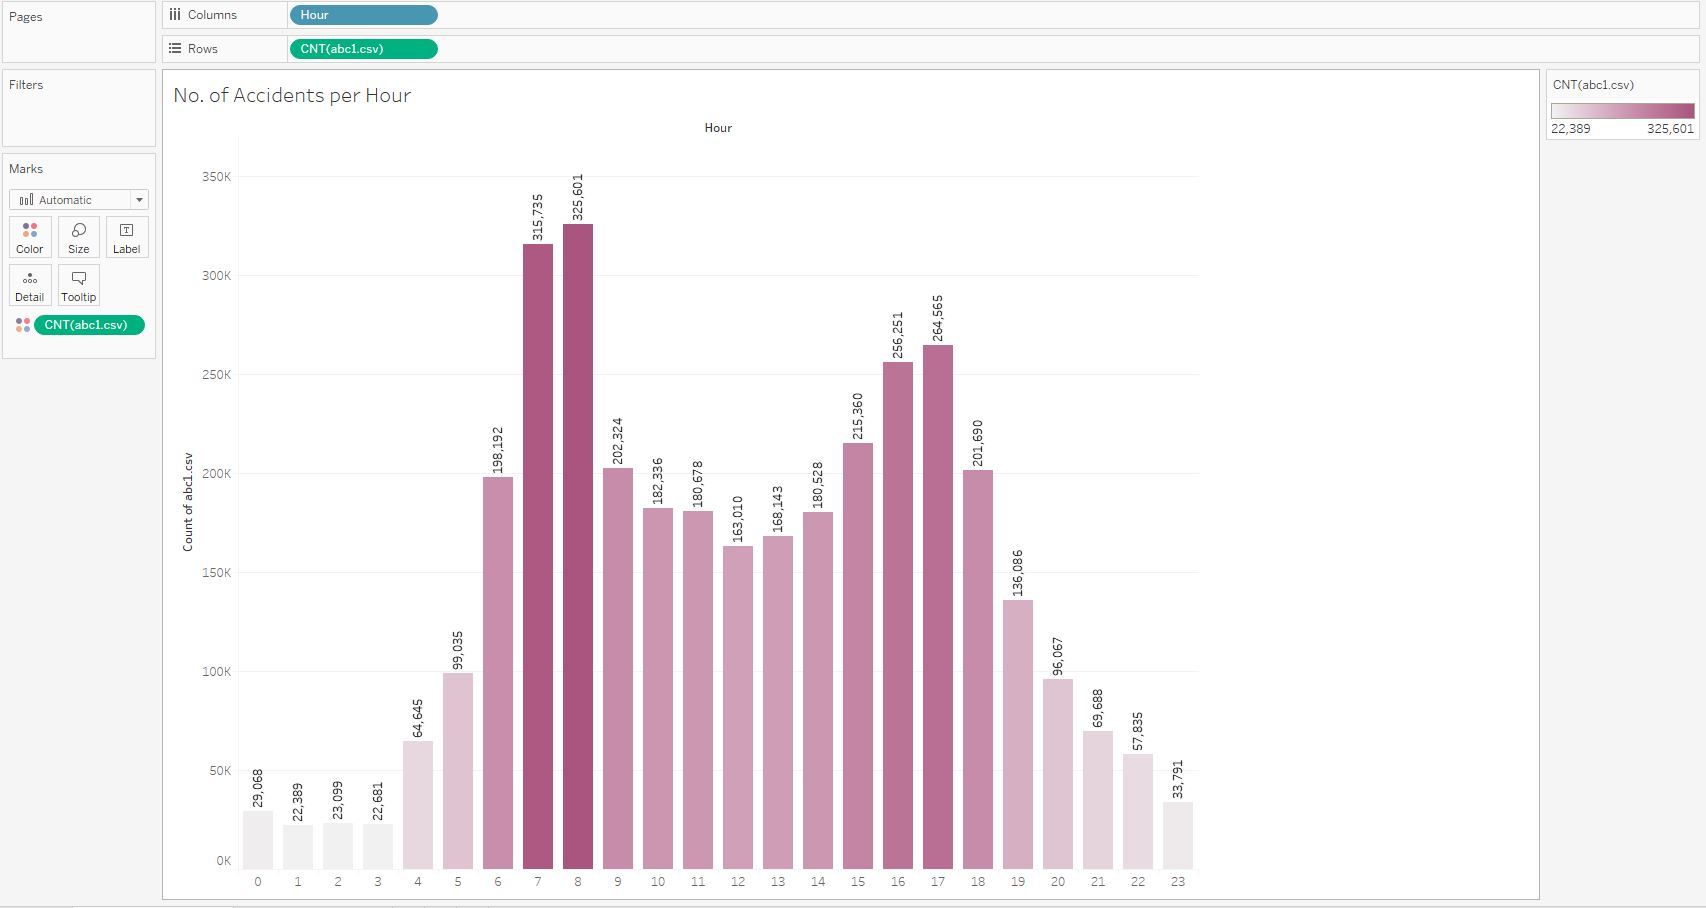

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/No. of accidents per hour.JPG')

According to the observation, most accidents happen during the daytime. There are two peaks on 7-8 and 16-17 when people are on the commute between the workplace and home. From 23 to 3 o'clock, before dawn, the number of accidents is relatively at the lower level as most people are in sleep


Now we will analyze the relation between number of accidents and Weather_Condition.

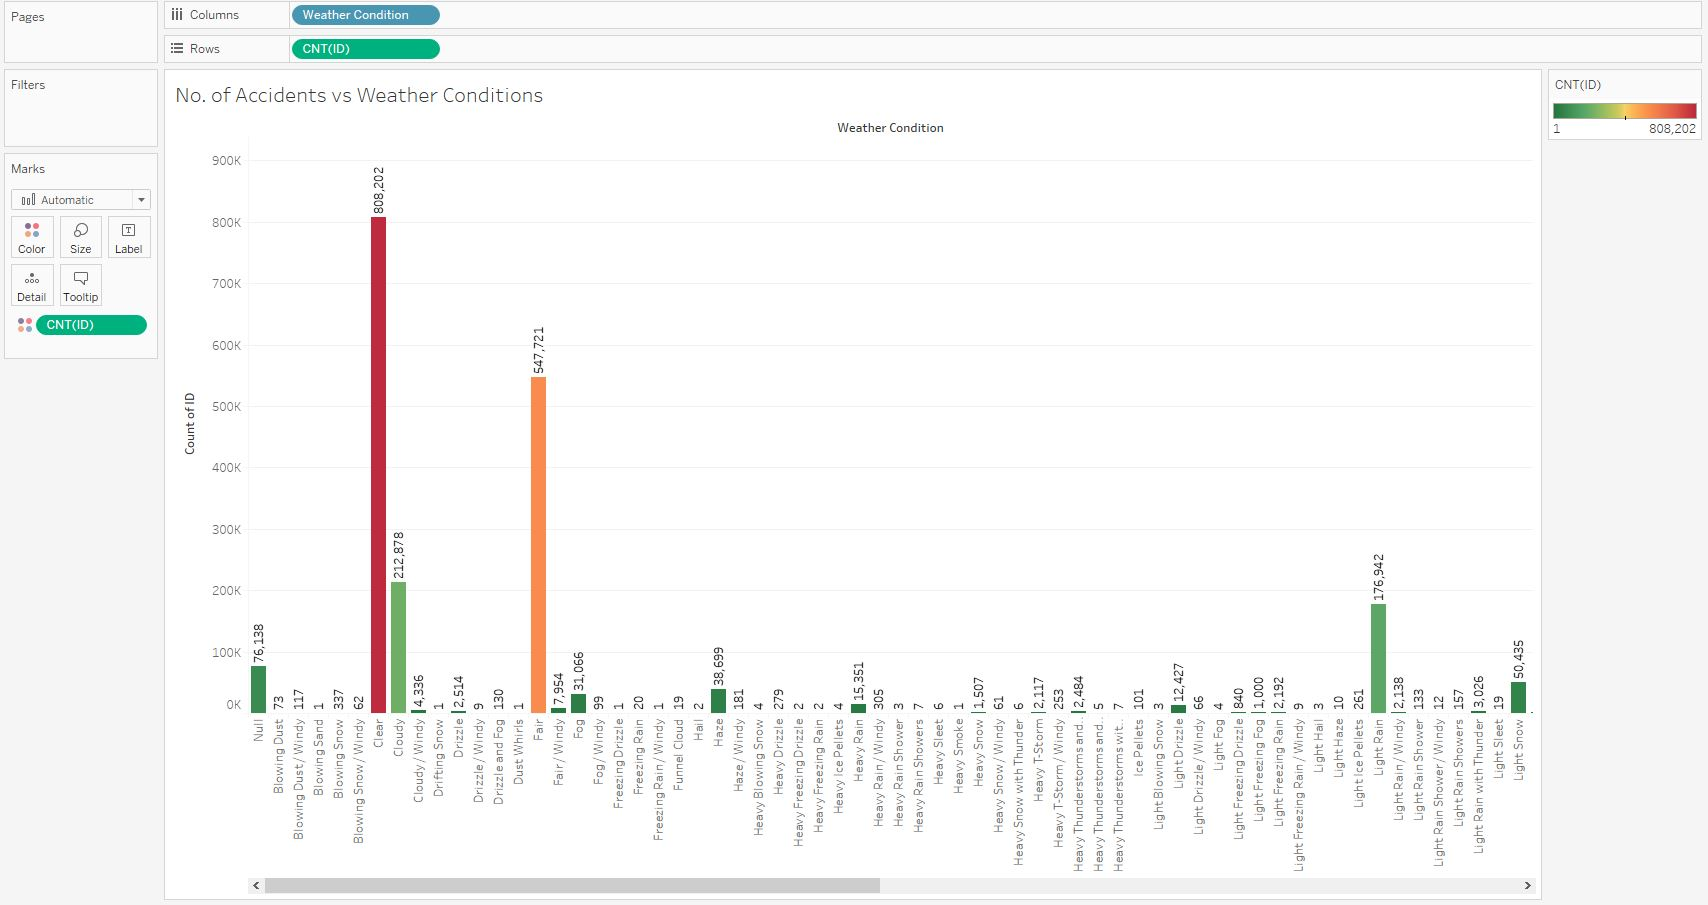

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/No. of  Accidents vs Weather Condition_1.JPG')

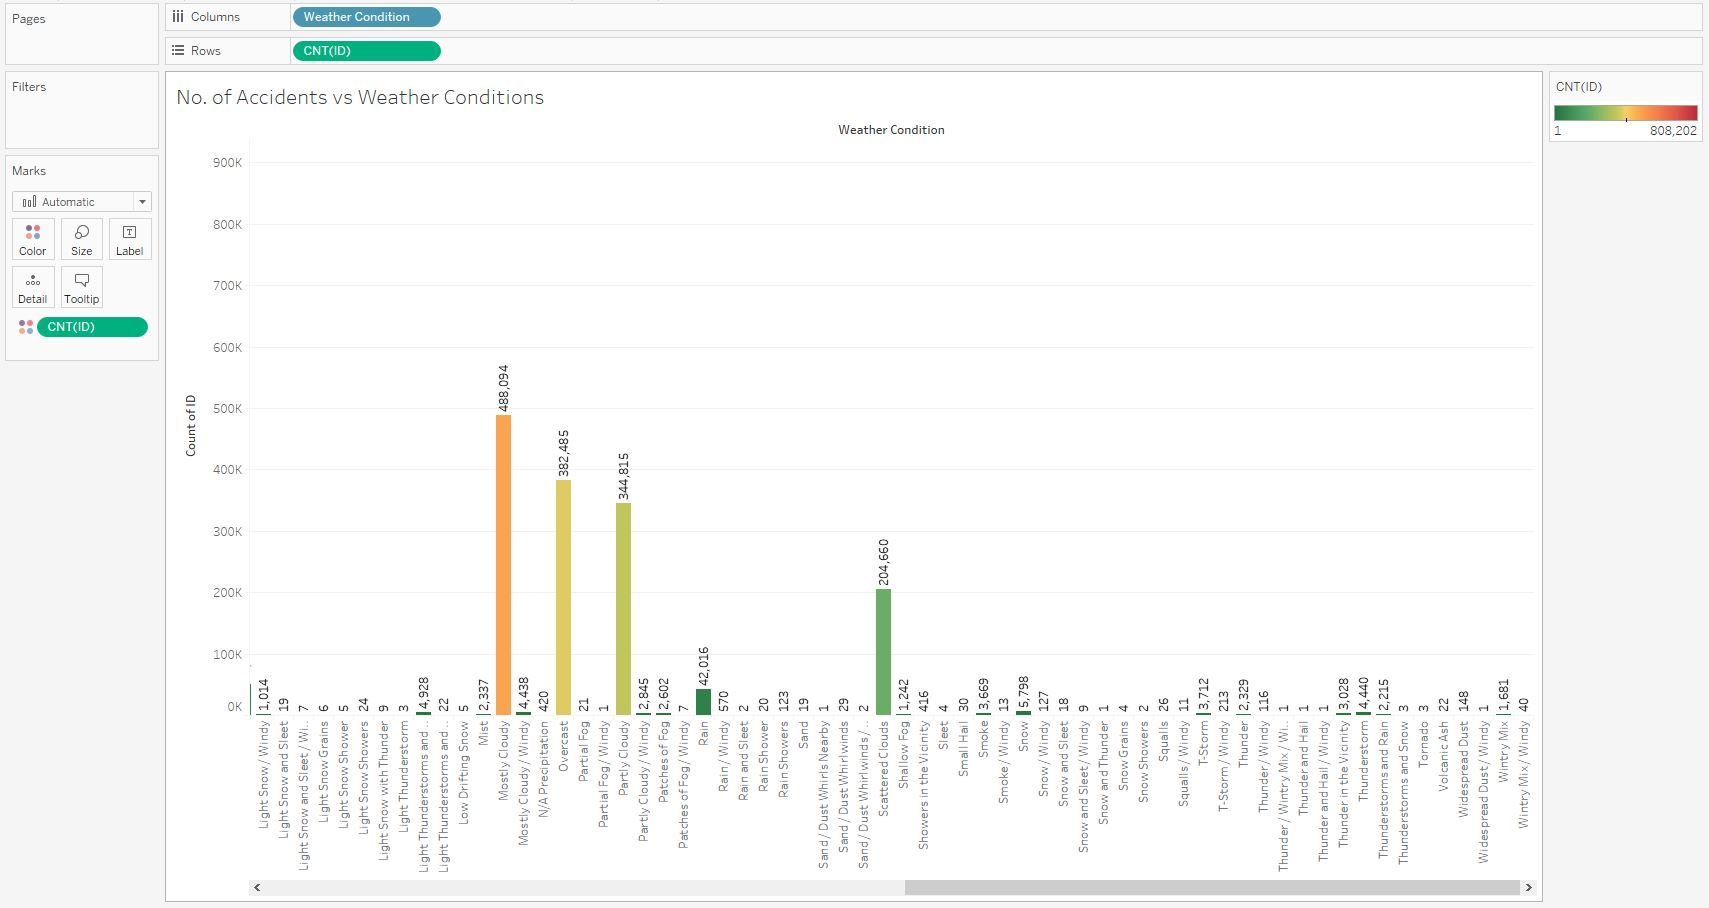

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/No. of  Accidents vs Weather Condition_2.JPG')

Now we will analyze the Severity of accidents with respect to Weather Condition.

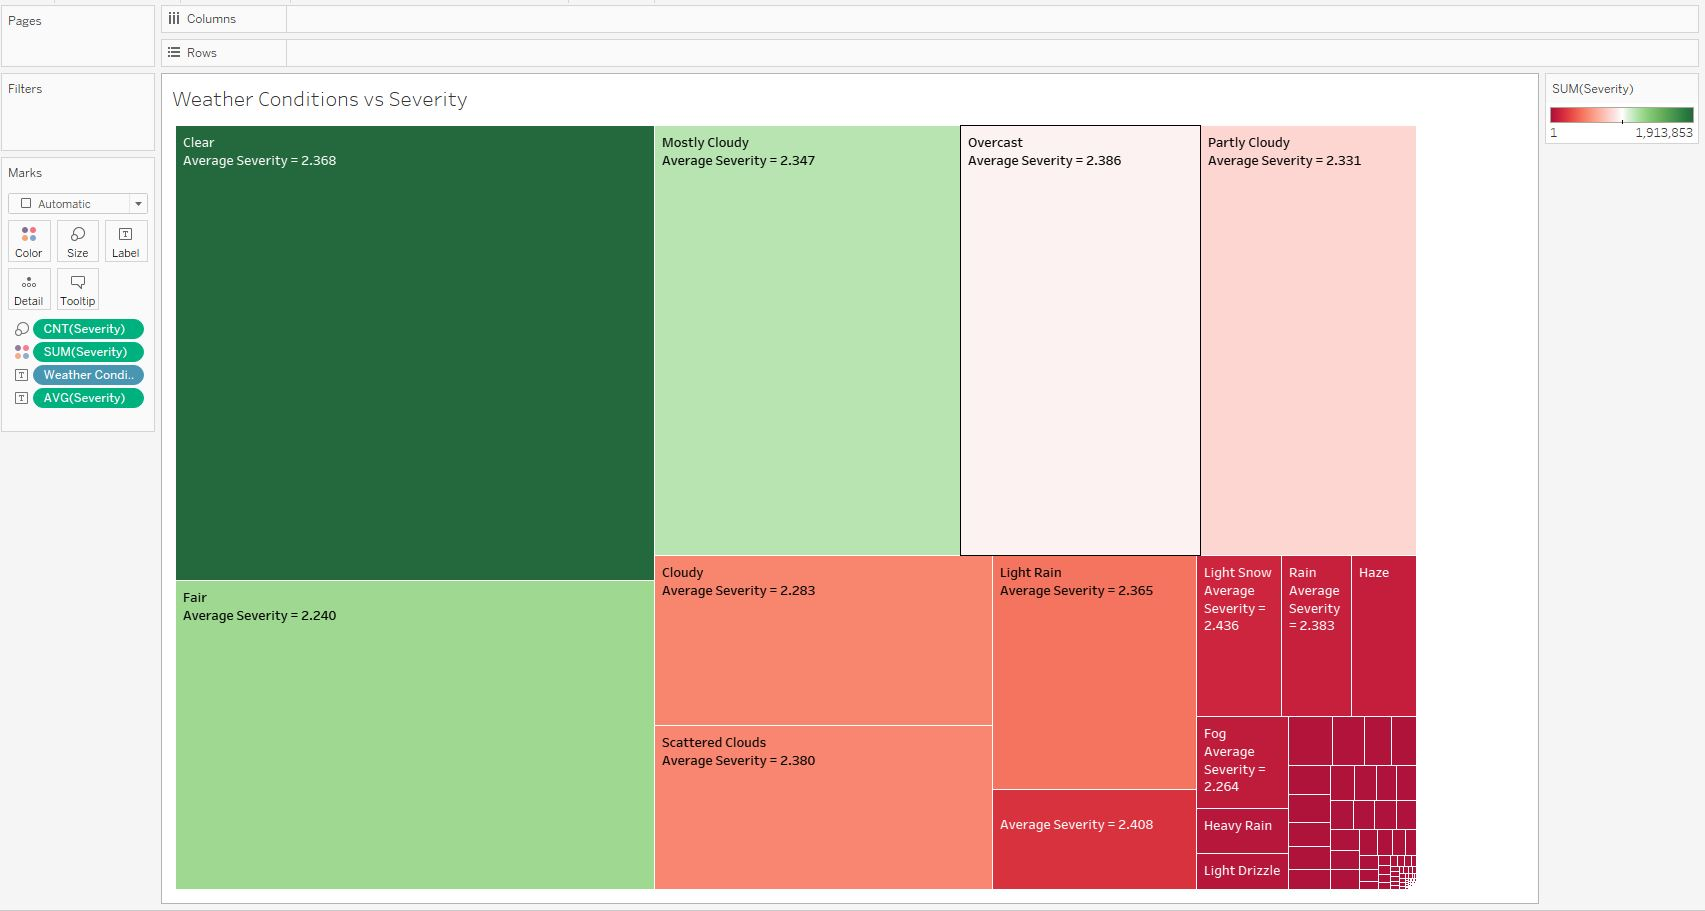

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/Weather Condition vs Severity.JPG')

As we can see in the graph above, the accidents with highest average Severity occured in Clear weather condition

So as we can see, there are 127 different categories.

Since the feature Weather_Condition has around 127 different categories, it will increase the complexity of modeling and visualizing the feature efficiently. Thus, we need to combine a few types of weather conditions.


In [ ]:
#create a seperate dataframe (df) to work on
df= dataset

df.Weather_Condition.replace(['Blowing Dust / Windy', 'Wintry Mix / Windy','Widespread Dust / Windy','Mostly Cloudy / Windy','Heavy T-Storm / Windy','Sand / Dust Whirlwinds / Windy','Fair / Windy','Light Rain / Windy','Drizzle / Windy','Sand / Dust Whirlwinds','Blowing Dust','Sand / Dust Whirls Nearby','Widespread Dust','Dust Whirls','Sand','Blowing Sand'], 'windy', inplace=True)
df.Weather_Condition.replace(['Thunder / Windy', 'Light Thunderstorm','Thunder and Hail','Light Rain with Thunder','Thunder in the Vicinity','Thunder','Thunder / Wintry Mix / Windy','Heavy Thunderstorms with Small Hail','Light Thunderstorms and Rain','Thunder and Hail / Windy','Hail','Light Ice Pellets','Ice Pellets','Heavy Ice Pellets','Small Hail','Light Hail','Tornado', 'T-Storm / Windy','T-Storm','Heavy T-Storm','Squalls','Squalls / Windy','Thunderstorm'], 'thunderstorm', inplace=True)
df.Weather_Condition.replace(['Light Thunderstorms and Snow', 'Snow Showers','Heavy Snow / Windy','Light Snow and Sleet','Light Snow and Sleet / Windy','Blowing Snow / Windy','Heavy Snow with Thunder','Light Blowing Snow','Heavy Snow','Heavy Thunderstorms and Snow','Snow / Windy','Snow and Sleet','Heavy Sleet','Light Snow with Thunder','Snow and Thunder','Heavy Blowing Snow','Thunderstorms and Snow','Drifting Snow','Blowing Snow','Low Drifting Snow','Light Snow / Windy','Light Snow Grains','Snow and Sleet / Windy','Light Snow','Snow','Snow Grains','Light Sleet','Sleet'], 'snow', inplace=True)
df.Weather_Condition.replace(['Heavy Smoke', 'Smoke','Volcanic Ash','Smoke / Windy'], 'smoke', inplace=True)
df.Weather_Condition.replace(['Light Rain', 'Light Freezing Drizzle','Heavy Rain','Light Rain Showers','Thunderstorms and Rain','Drizzle','Rain Showers','Light Rain Shower','Heavy Thunderstorms and Rain','Heavy Rain / Windy','Heavy Freezing Rain','Light Freezing Rain / Windy','Rain and Sleet','Light Snow Showers','Freezing Rain / Windy','Light Drizzle','Light Freezing Rain','Heavy Drizzle','Wintry Mix','Light Drizzle / Windy','Freezing Rain','Freezing Drizzle','Heavy Freezing Drizzle','Heavy Rain Shower','Showers in the Vicinity','Rain / Windy','Heavy Rain Showers','Light Rain Shower / Windy','Light Snow Shower','Rain','Rain Shower','N/A Precipitation'], 'rain', inplace=True)
df.Weather_Condition.replace(['Light Freezing Fog','Drizzle and Fog','Partial Fog / Windy','Mist','Light Fog','Patches of Fog / Windy','Fog / Windy','Partial Fog','Fog','Shallow Fog','Patches of Fog','Haze','Light Haze','Haze / Windy'], 'fog', inplace=True)
df.Weather_Condition.replace(['Cloudy / Windy','Partly Cloudy / Windy','Funnel Cloud','Overcast','Scattered Clouds','Mostly Cloudy','Partly Cloudy','Cloudy'], 'cloudy', inplace=True)
df.Weather_Condition.replace(['Fair','Clear'], 'clear', inplace=True)
df.Weather_Condition.replace(['nan'], 'NaN', inplace=True)

In [ ]:
df['Weather_Condition'].unique()

array(['rain', 'cloudy', 'snow', 'fog', 'clear', nan, 'smoke',
       'thunderstorm', 'windy'], dtype=object)

Now, after combining the similar categories we are left with only 8 types of weather condition along with some missing values.

In [ ]:
# Replacing these 8 new categories into our primary dataframe (dataset.)
dataset['Weather_Condition']=df['Weather_Condition']
dataset['Weather_Condition'].unique()

array(['rain', 'cloudy', 'snow', 'fog', 'clear', nan, 'smoke',
       'thunderstorm', 'windy'], dtype=object)

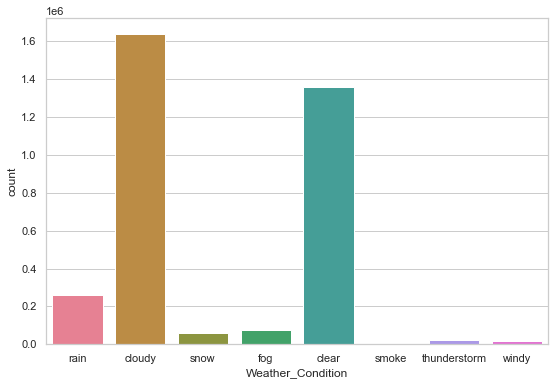

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
sns.color_palette("husl", 9)
sns.countplot(x="Weather_Condition", data=dataset, palette="husl")

Now we will clean the categorical feature *Wind_Direction* as it contains many irregularities.

In [ ]:
# Create a new dataframe df to work on
df=dataset
df['Wind_Direction'].unique()

array(['Calm', 'SW', 'SSW', 'WSW', 'WNW', 'NW', 'West', 'NNW', 'NNE',
       'South', 'North', 'Variable', 'SE', 'SSE', 'ESE', 'East', 'NE',
       'ENE', 'E', 'W', nan, 'S', 'VAR', 'CALM', 'N'], dtype=object)

In [ ]:
# Now we will merge all these different categories into 4 major class i.e. W, S, N, E, SW, NW, SE, NE, VAR, and CALM

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'


In [ ]:
# Replace these new categories into our primary dataframe (dataset.)
dataset['Wind_Direction']=df['Wind_Direction']
dataset['Wind_Direction'].unique()

array(['CALM', 'SW', 'S', 'W', 'NW', 'N', 'VAR', 'SE', 'E', 'NE', nan],
      dtype=object)

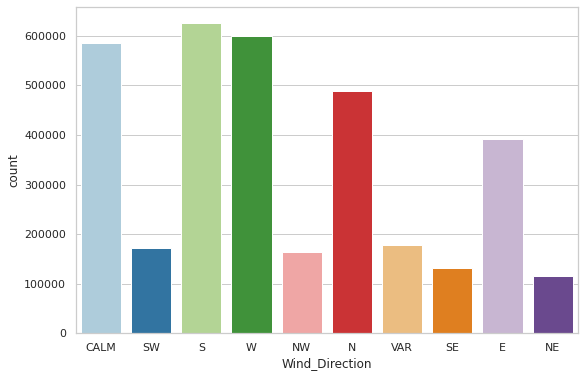

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
sns.color_palette("Paired")
sns.countplot(x="Wind_Direction", data=dataset, palette="Paired")

Now, we will analyze how temperature affects the Severity of an accident.

Text(0, 0.5, 'Temperature')

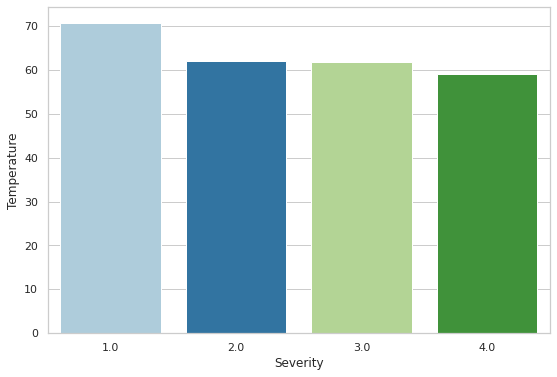

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,6))
sns.color_palette("husl", 9)
from numpy import mean
sns.barplot(x="Severity", y="Temperature(F)", estimator=mean, data=dataset, ci=False,palette="Paired")
plt.xlabel("Severity")
plt.ylabel("Temperature")

An accident with Severity 4 has a higher mean frequency at a lower temperature. Whereas, Severity 1 accidents at higher temperatures have a higher mean frequency.

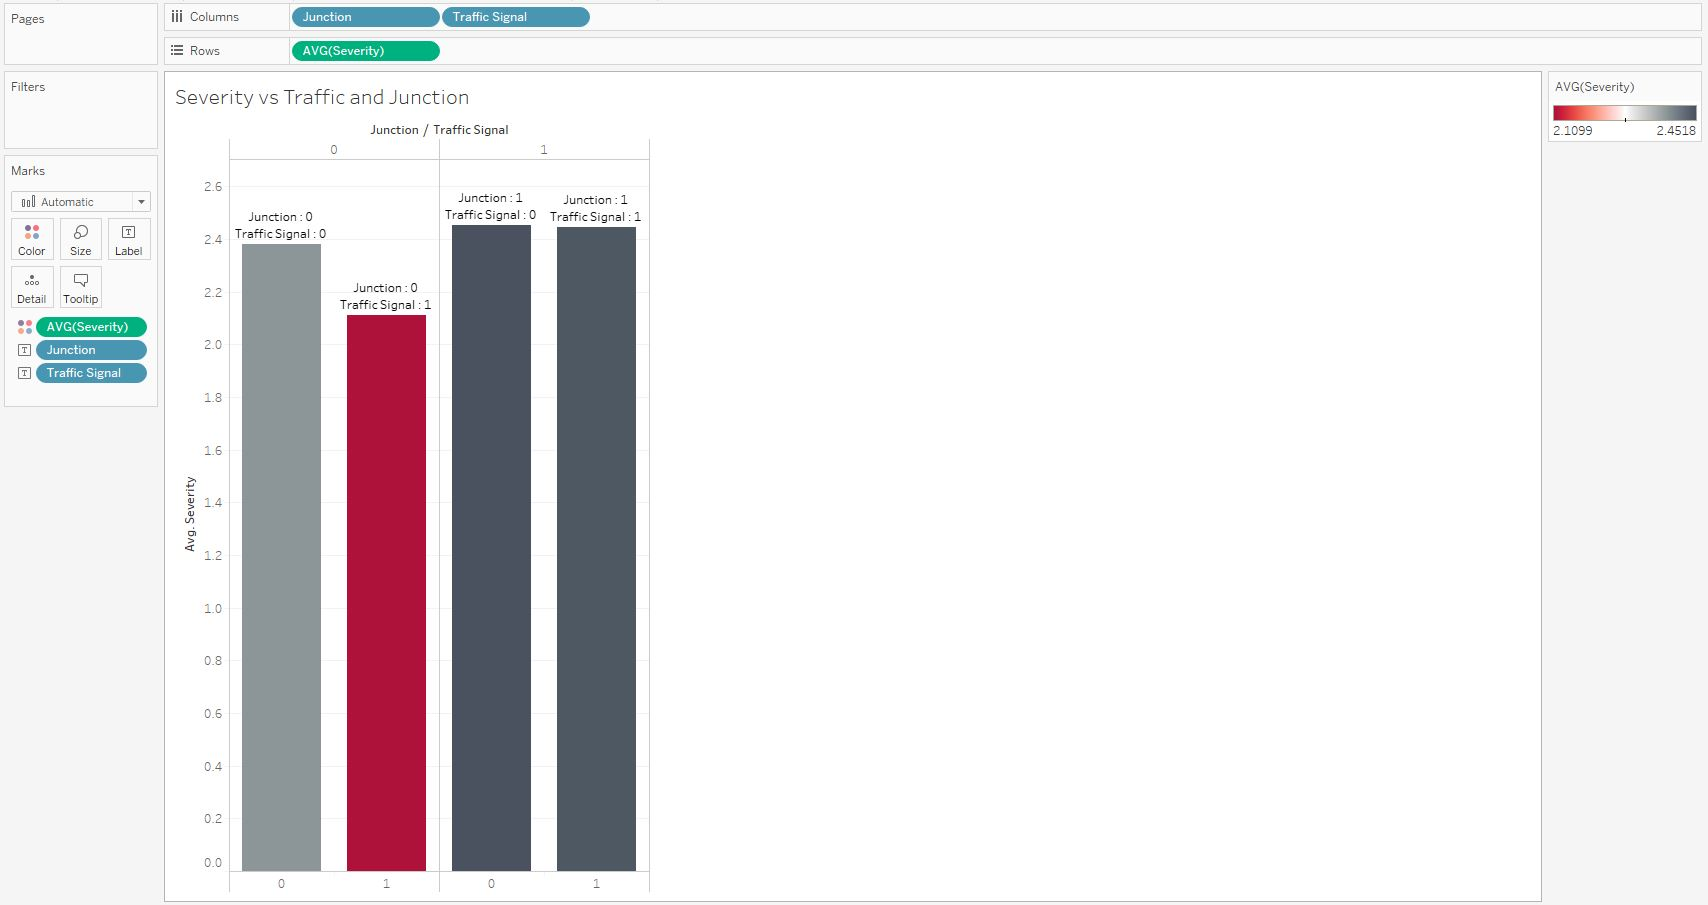

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/Severity vs Traffic and Junction.JPG')

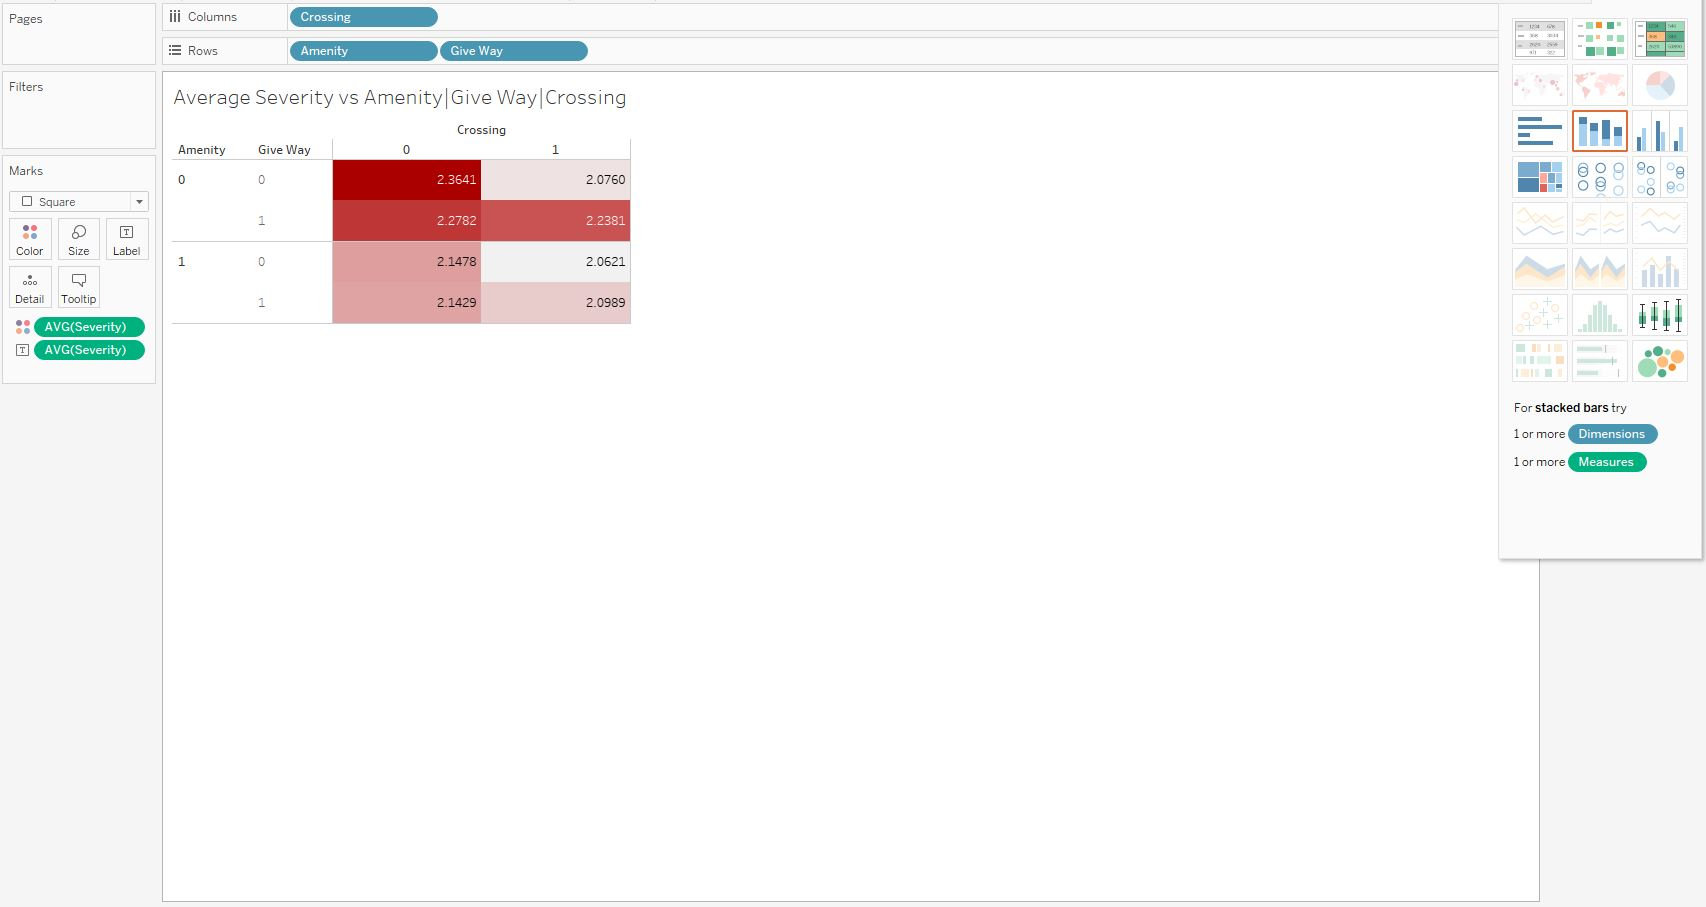

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/AvgSeverity vs Amenity,GiveWay,Crossing.JPG')

Considering the enormous sample size and the severity distribution, we believe that every tiny fluctuation in severity also matters. According to the above statistical visualization, it is evident that except for junction, specific features(like traffic signals, crossing, amenity) can help reduce accident severity.
This might be because when there are traffic signals, crossing, or other facilities, people tend to be cautious. However, when there are junctions, cars are more likely to collide due to limited visibility.


### Handling Missing Values

Now we will identify the percentage of missing values in every variable.

In [ ]:
print("The percentage of missing values in dataset")
((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2)

The percentage of missing values in dataset


ID                        0.00
Source                    0.00
TMC                      29.45
Severity                  0.00
Start_Time                0.00
End_Time                  0.00
Start_Lat                 0.00
Start_Lng                 0.00
End_Lat                  70.55
End_Lng                  70.55
Distance(mi)              0.00
Description               0.00
Number                   64.40
Street                    0.00
Side                      0.00
City                      0.00
County                    0.00
State                     0.00
Zipcode                   0.03
Country                   0.00
Timezone                  0.11
Airport_Code              0.19
Weather_Timestamp         1.23
Temperature(F)            1.87
Wind_Chill(F)            53.17
Humidity(%)               1.98
Pressure(in)              1.59
Visibility(mi)            2.16
Wind_Direction            1.68
Wind_Speed(mph)          12.94
Precipitation(in)        57.66
Weather_Condition         2.17
Amenity 

#### Dropping Features

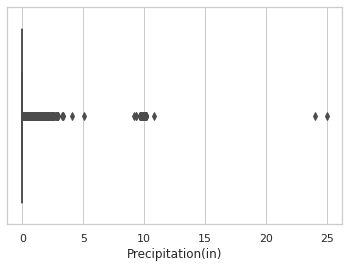

In [ ]:
import seaborn as sns
sns.boxplot(x=dataset['Precipitation(in)'])

We will remove *Precipitation(in)* because 57% of the the values in Precipitation are missing. And the remaining vlaues consist of many outliers.

More than 50% percent of data of 'Number', 'Wind_Chill(F)' is missing. Droping nan, and value imputation wouldn't work for these features. Thus, 'Number' and 'Wind_Chill(F)' will be dropped because they are not highly related to Severity. 

Also, 70.55% of data is missing in the variables *End_Lat* and *End_Lng*. So we will drop those variables.

Also, features like Source, Start_Lat, Start_Lng, Side, City, County, Zipcode, Timezone,Turning_Loop, Airport_Code, and Weather_Timestamp are not highly contributing towards predicting the Severity of an accident. Thus we will drop these features.

Apart from that Civil_Twilight, Nautical_Twilight, and Astronomical_Twilight does not highly relate Severity and similar cases are already considered in the Weather Condition, so it is better to drop these features as well.

 

Apart from the above features, we will also drop other irrelevant columns that do not contribute towards predicting Severity.

In [ ]:
# We will create a new dataframe 'df' to work with 
df= dataset

In [ ]:
df = df.drop(['Number','Wind_Chill(F)'], axis=1)
df = df.drop(['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','Timezone','Weather_Timestamp','Turning_Loop'], axis=1)
df = df.drop(['Start_Lat','Start_Lng','End_Lat','End_Lng'], axis=1)
df= df.drop(['County','Precipitation(in)','Source','Side'], axis=1)

Since we are not going to focus on Text based analysis using NLP, we will drop the following columns.

In [ ]:
df= df.drop(['ID','TMC','Country','Street','Description'], axis=1)

In [ ]:
# Now we will replace the updated dataframe with our main dataframe i.e. dataset
dataset=df

#### Adding New Features

Now we will introduce a new variable *Duration(min)* by calculating the difference between our exixting variables(*Start_Time* and *End_Time*.)

In [ ]:
dataset['Start_Time'] = pd.to_datetime(dataset['Start_Time'], errors='coerce')
dataset['End_Time'] = pd.to_datetime(dataset['End_Time'], errors='coerce')
dataset["Duration(min)"]=round((dataset['End_Time']-dataset['Start_Time'])/np.timedelta64(1,'m')) #in minutes

Since, *Duration(min)* cannot be negative we need to drop the negative values.


In [ ]:
#  Drop the rows with Duration(min)<0
negative=dataset["Duration(min)"]<=0

# Set outliers to NAN
dataset[negative] = np.nan

# Drop rows with negative Duration(min)
dataset.dropna(subset=["Duration(min)"],axis=0,inplace=True)

<Figure size 648x720 with 0 Axes>

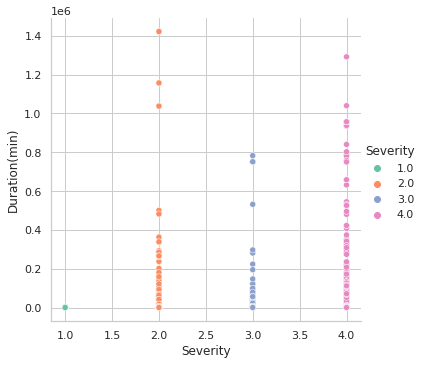

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(9,10))
sns.color_palette("husl", 9)
sns.relplot(data=dataset, x="Severity", y="Duration(min)", hue="Severity", palette='Set2')

An increased population can be good for a city, but specific practical challenges can be created by population growth. This may involve difficulties with accommodation and employment, as well as access to other amenities. In reality, more people also means more vehicles on the road. More vehicles can lead to more accidents, causing motorists and pedestrians to suffer a larger number of accidents and fatalities.

For our analysis we have also considered secondary dataset of Population of United States. The original source of the dataset being [United States Census Bureau](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html)
. We have taken the population of the year 2016, 2017, 2018 and 2019 of all the states of US.

Thus, we will append data from another dataset and add a new column of Population in our existing dataset. 


In [ ]:
pop = pd.read_csv("/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Data/uspopulation.csv")
pop.head(10)

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2011,NPOPCHG_2012,NPOPCHG_2013,NPOPCHG_2014,NPOPCHG_2015,NPOPCHG_2016,NPOPCHG_2017,NPOPCHG_2018,NPOPCHG_2019,PPOPCHG_2010,PPOPCHG_2011,PPOPCHG_2012,PPOPCHG_2013,PPOPCHG_2014,PPOPCHG_2015,PPOPCHG_2016,PPOPCHG_2017,PPOPCHG_2018,PPOPCHG_2019,NRANK_ESTBASE2010,NRANK_POPEST2010,NRANK_POPEST2011,NRANK_POPEST2012,NRANK_POPEST2013,NRANK_POPEST2014,NRANK_POPEST2015,NRANK_POPEST2016,NRANK_POPEST2017,NRANK_POPEST2018,NRANK_POPEST2019,NRANK_NPCHG2010,NRANK_NPCHG2011,NRANK_NPCHG2012,NRANK_NPCHG2013,NRANK_NPCHG2014,NRANK_NPCHG2015,NRANK_NPCHG2016,NRANK_NPCHG2017,NRANK_NPCHG2018,NRANK_NPCHG2019,NRANK_PPCHG2010,NRANK_PPCHG2011,NRANK_PPCHG2012,NRANK_PPCHG2013,NRANK_PPCHG2014,NRANK_PPCHG2015,NRANK_PPCHG2016,NRANK_PPCHG2017,NRANK_PPCHG2018,NRANK_PPCHG2019
0,10,0,0,0,United States,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523,563561,2235208,2274116,2162725,2307293,2334155,2306148,2044228,1701962,1552022,0.182525,0.722616,0.729920,0.689137,0.730171,0.733317,0.719244,0.633003,0.523704,0.475078,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
1,20,1,0,0,Northeast Region,55318443,55380134,55604223,55775216,55901806,56006011,56034684,56042330,56059240,56046620,55982803,61691,224089,170993,126590,104205,28673,7646,16910,-12620,-63817,0.111520,0.404638,0.307518,0.226965,0.186407,0.051196,0.013645,0.030174,-0.022512,-0.113864,4,4,4,4,4,4,4,4,4,4,4,3,3,4,4,4,4,4,4,4,4,3,3,3,4,4,4,4,4,4,4
2,20,2,0,0,Midwest Region,66929725,66974416,67157800,67336743,67560379,67745167,67860583,67987540,68126781,68236628,68329004,44691,183384,178943,223636,184788,115416,126957,139241,109847,92376,0.066773,0.273812,0.266452,0.332116,0.273515,0.170368,0.187085,0.204804,0.161239,0.135376,3,3,3,3,3,3,3,3,3,3,3,4,4,3,3,3,3,3,3,3,3,4,4,4,3,3,3,3,3,3,3
3,20,3,0,0,South Region,114563030,114866680,116006522,117241208,118364400,119624037,120997341,122351760,123542189,124569433,125580448,303650,1139842,1234686,1123192,1259637,1373304,1354419,1190429,1027244,1011015,0.265051,0.992317,1.064325,0.958018,1.064203,1.148017,1.119379,0.972956,0.831492,0.811608,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,20,4,0,0,West Region,71946907,72100436,72788329,73477823,74167130,74925793,75742555,76559681,77257329,77834820,78347268,153529,687893,689494,689307,758663,816762,817126,697648,577491,512448,0.213392,0.954076,0.947259,0.938116,1.022910,1.090095,1.078820,0.911247,0.747490,0.658379,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,40,3,6,1,Alabama,4780125,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185,5312,13632,16519,14493,11718,10548,11178,10961,13195,15504,0.111127,0.284864,0.344213,0.300960,0.242605,0.217853,0.230363,0.225372,0.270695,0.317206,23,23,23,23,23,23,24,24,24,24,24,28,32,25,31,32,30,29,28,23,20,37,38,34,33,35,36,34,33,28,26
6,40,4,9,2,Alaska,710249,713910,722128,730443,737068,736283,737498,741456,739700,735139,731545,3661,8218,8315,6625,-785,1215,3958,-1756,-4561,-3594,0.515453,1.151125,1.151458,0.906984,-0.106503,0.165018,0.536679,-0.236831,-0.616601,-0.488887,47,47,47,47,47,48,48,48,48,48,48,32,39,40,42,47,42,37,43,46,43,2,7,11,18,48,37,22,48,50,50
7,40,4,8,4,Arizona,6392288,6407172,6472643,6554978,6632764,6730413,6829676,6941072,7044008,7158024,7278717,14884,65471,82335,77786,97649,99263,111396,102936,114016,120693,0.232843,1.021839,1.272046,1.186671,1.472222,1.474843,1.631058,1.482999,1.618624,1.686122,16,16,16,15,15,15,14,14,14,14,14,11,10,7,5,4,7,7,7,3,3,17,10,8,7,7,9,7,6,4,3
8,40,3,7,5,Arkansas,2916031,2921964,2940667,2952164,2959400,2967392,2978048,2989918,3001345,3009733,3017804,5933,18703,11497,7236,7992,10656,11870,11427,8388,8071,0.203461,0.640083,0.390966,0.245108,0.270055,0.359103,0.398583,0.38218

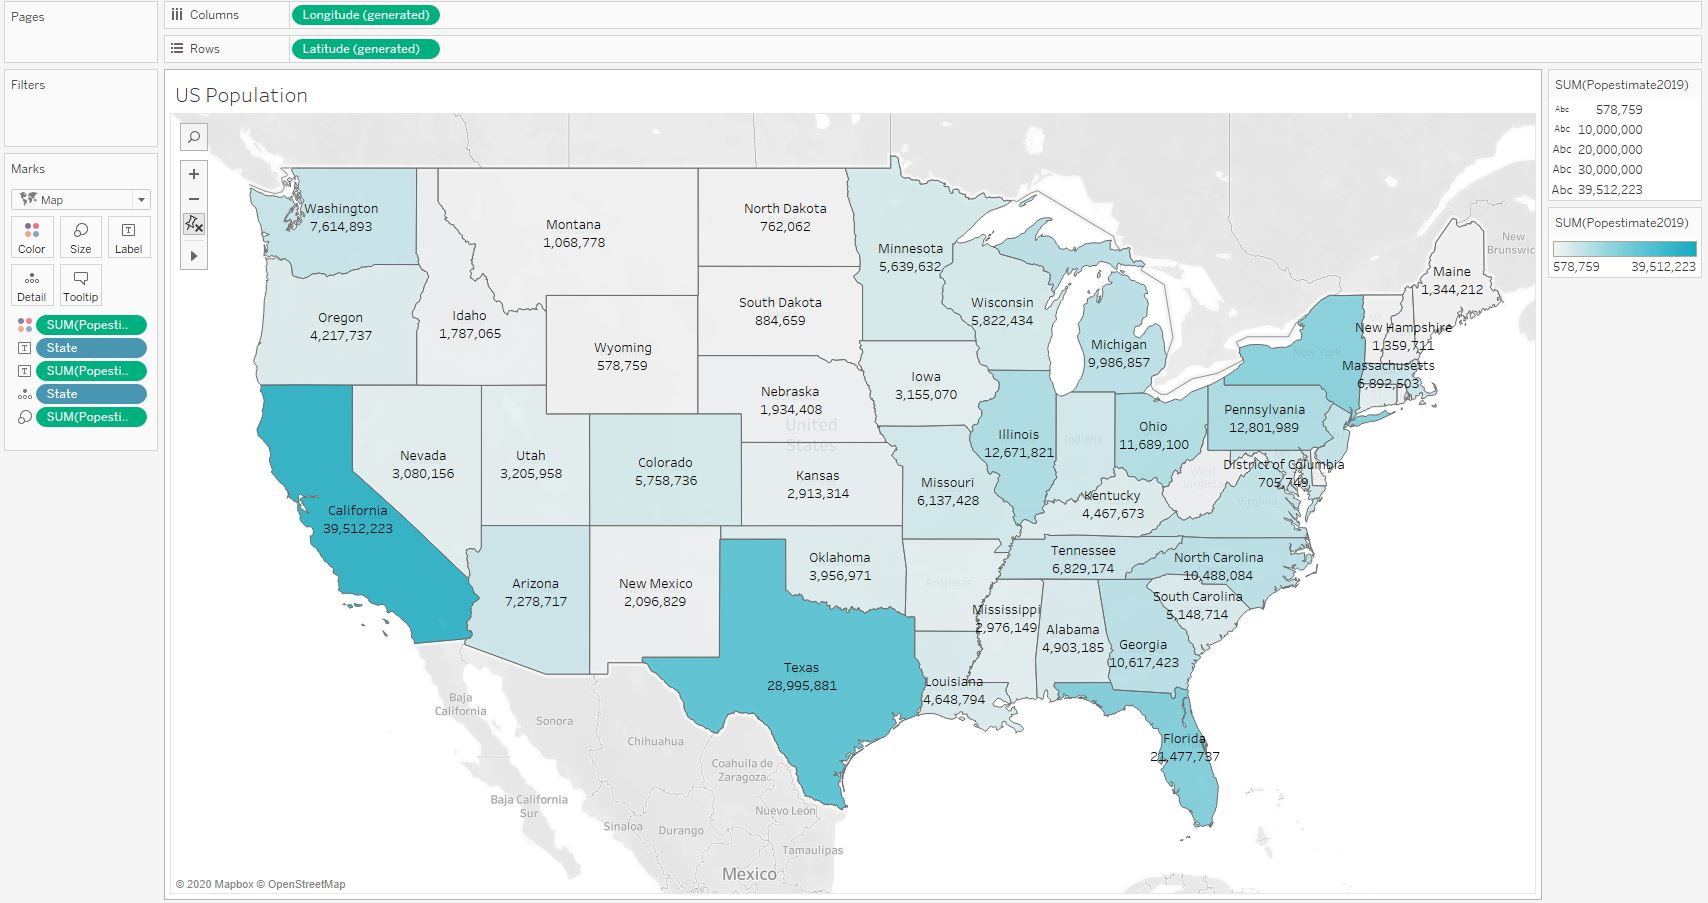

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/US Population_1.JPG')

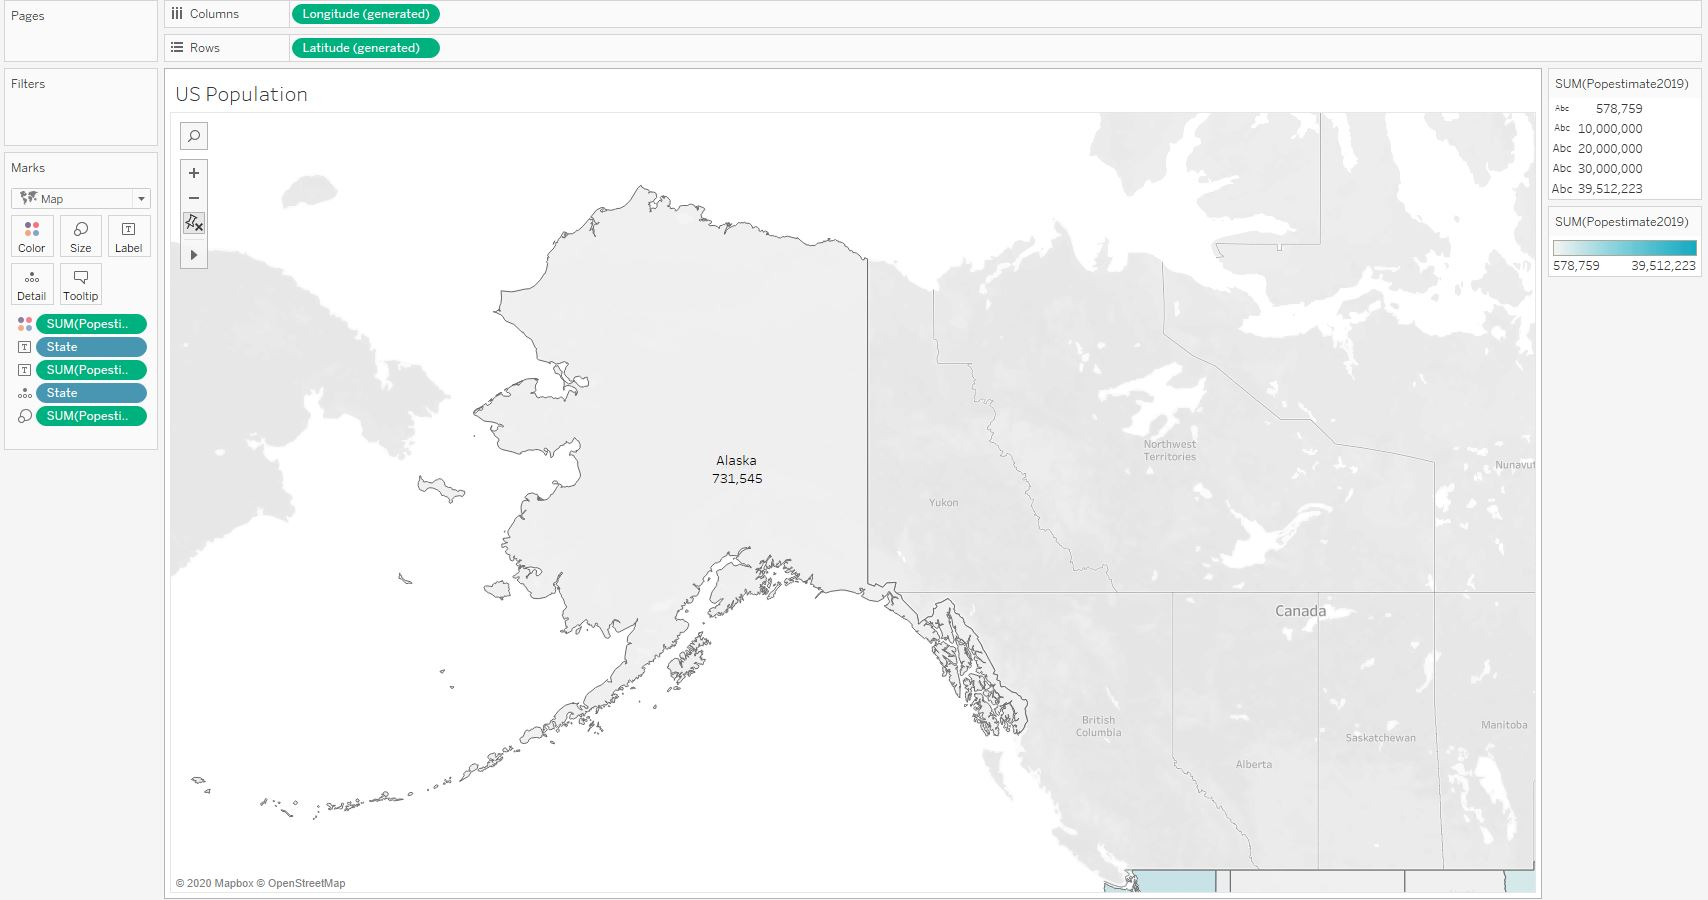

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/ISDS 577- Capstone/US Accidents/Kunal/Visualizations/US Population_2.JPG')

As evident from the graph above, California have highest population followed by Florida and Texas. That is one of the reason why No. of accidents in these states is high. 

For our analysis we will only consider the population of different states of US from 2016 to 2019.

In [ ]:
pop = pop.drop(columns=['SUMLEV','REGION','DIVISION','ESTIMATESBASE2010','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015','NPOPCHG_2010','NPOPCHG_2011','NPOPCHG_2012','NPOPCHG_2013','NPOPCHG_2014','NPOPCHG_2015','NPOPCHG_2016','NPOPCHG_2017','NPOPCHG_2018','NPOPCHG_2019','PPOPCHG_2010','PPOPCHG_2011','PPOPCHG_2012','PPOPCHG_2013','PPOPCHG_2014','PPOPCHG_2015','PPOPCHG_2016','PPOPCHG_2017','PPOPCHG_2018','PPOPCHG_2019','NRANK_ESTBASE2010','NRANK_POPEST2010','NRANK_POPEST2011','NRANK_POPEST2012','NRANK_POPEST2013','NRANK_POPEST2014','NRANK_POPEST2015','NRANK_POPEST2016','NRANK_POPEST2017','NRANK_POPEST2018','NRANK_POPEST2019','NRANK_NPCHG2010','NRANK_NPCHG2011','NRANK_NPCHG2012','NRANK_NPCHG2013','NRANK_NPCHG2014','NRANK_NPCHG2015','NRANK_NPCHG2016','NRANK_NPCHG2017','NRANK_NPCHG2018','NRANK_NPCHG2019','NRANK_PPCHG2010','NRANK_PPCHG2011','NRANK_PPCHG2012','NRANK_PPCHG2013','NRANK_PPCHG2014','NRANK_PPCHG2015','NRANK_PPCHG2016','NRANK_PPCHG2017','NRANK_PPCHG2018','NRANK_PPCHG2019'], axis=1)
pop = pop.drop(columns=['STATE'], axis = 1)

In [ ]:
pop.head()

,NAME,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,United States,322941311,324985539,326687501,328239523
1,Northeast Region,56042330,56059240,56046620,55982803
2,Midwest Region,67987540,68126781,68236628,68329004
3,South Region,122351760,123542189,124569433,125580448
4,West Region,76559681,77257329,77834820,78347268


Now we will consolidate these population data of 4 years into one single column (Population) by taking the average population of these 4 years.

In [ ]:
p= pop[['POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019']]
new_pop= p.mean(axis=1)
pop['Population']=new_pop
pop = pop.drop(columns=['POPESTIMATE2016','POPESTIMATE2017','POPESTIMATE2018','POPESTIMATE2019'], axis=1)
pop = pop.rename(columns={'NAME':'State'})

In [ ]:
pop.head(10)

,State,Population
0,United States,3.257135e+08
1,Northeast Region,5.603275e+07
2,Midwest Region,6.816999e+07
3,South Region,1.240110e+08
4,West Region,7.749977e+07
5,Alabama,4.882219e+06
6,Alaska,7.369600e+05
7,Arizona,7.105455e+06
8,Arkansas,3.004700e+06
9,California,3.937486e+07


Since our primary dataset, the *State* column consists of abbreviations such as AL, CA, FL...

But in order to append the population with our original dataset, we need to convert these abbreviations into their full form.

In [ ]:
dataset['State'].replace(['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'],['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'], inplace=True)
dataset['State'].unique()

array(['Ohio', 'West Virginia', 'California', 'Florida', 'Georgia',
       'South Carolina', 'Nebraska', 'Iowa', 'Illinois', 'Missouri',
       'Wisconsin', 'Indiana', 'Michigan', 'New Jersey', 'New York',
       'Connecticut', 'Massachusetts', 'Rhode Island', 'New Hampshire',
       'Pennsylvania', 'Kentucky', 'Maryland', 'Virginia', 'DC',
       'Delaware', 'Texas', 'Washington', 'Oregon', 'Alabama',
       'Tennessee', 'North Carolina', 'Kansas', 'Louisiana', 'Oklahoma',
       'Colorado', 'Utah', 'Arizona', 'Minnesota', 'Mississippi',
       'Nevada', 'Maine', 'Arkansas', 'Idaho', 'Vermont', 'New Mexico',
       'North Dakota', 'Wyoming', 'South Dakota', 'Montana'], dtype=object)

In [ ]:
dataset = pd.merge(dataset, pop, on='State')
dataset.head(10)

,Severity,Start_Time,End_Time,Distance(mi),State,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Duration(min),Population
0,3.0,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Ohio,36.9,91.0,29.68,10.0,CALM,NaN,rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,314.0,11664865.25
1,2.0,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Ohio,37.9,100.0,29.65,10.0,CALM,NaN,rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25
2,2.0,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Ohio,36.0,100.0,29.67,10.0,SW,3.5,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,11664865.25
3,3.0,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Ohio,35.1,96.0,29.64,9.0,SW,4.6,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25
4,2.0,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Ohio,36.0,89.0,29.65,6.0,SW,3.5,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,11664865.25
5,3.0,2016-02-08 07:44:26,2016-02-08 08:14:26,0.01,Ohio,37.9,97.0,29.63,7.0,S,3.5,rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25
6,2.0,2016-02-08 07:59:35,2016-02-08 08:29:35,0.00,Ohio,34.0,100.0,29.66,7.0,W,3.5,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25
7,3.0,2016-02-08 07:59:58,2016-02-08 08:29:58,0.01,Ohio,34.0,100.0,29.66,7.0,W,3.5,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25
8,2.0,2016-02-08 08:00:40,2016-02-08 08:30:40,0.00,Ohio,33.3,99.0,29.67,5.0,SW,1.2,cloudy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25
9,3.0,2016-02-08 08:10:04,2016-02-08 08:40:04,0.01,Ohio,37.4,100.0,29.62,3.0,S,4.6,rain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25


#### Drop Rows with Missing Values 

In [ ]:
#dataset = dataset.drop(['Population_x','Population_y'], axis=1)

In [ ]:
print("The percentage of missing values in dataset")
((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2)

The percentage of missing values in dataset


Severity              0.00
Start_Time            0.00
End_Time              0.00
Distance(mi)          0.00
State                 0.00
Temperature(F)        1.85
Humidity(%)           1.96
Pressure(in)          1.57
Visibility(mi)        2.14
Wind_Direction        1.68
Wind_Speed(mph)      12.93
Weather_Condition     2.15
Amenity               0.00
Bump                  0.00
Crossing              0.00
Give_Way              0.00
Junction              0.00
No_Exit               0.00
Railway               0.00
Roundabout            0.00
Station               0.00
Stop                  0.00
Traffic_Calming       0.00
Traffic_Signal        0.00
Duration(min)         0.00
Population            0.00
dtype: float64

Now we will drop the rows with missing values.

In [ ]:

dataset = dataset.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)',
                       'Visibility(mi)','Wind_Direction','Wind_Speed(mph)','Weather_Condition', 'Start_Time','End_Time'])



In [ ]:
dataset= dataset.drop(['Start_Time', 'End_Time'], axis=1)

In [ ]:
# Just to check the missing values
print("The percentage of missing values in dataset")
((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2)

The percentage of missing values in dataset


Severity             0.0
Distance(mi)         0.0
State                0.0
Temperature(F)       0.0
Humidity(%)          0.0
Pressure(in)         0.0
Visibility(mi)       0.0
Wind_Direction       0.0
Wind_Speed(mph)      0.0
Weather_Condition    0.0
Amenity              0.0
Bump                 0.0
Crossing             0.0
Give_Way             0.0
Junction             0.0
No_Exit              0.0
Railway              0.0
Roundabout           0.0
Station              0.0
Stop                 0.0
Traffic_Calming      0.0
Traffic_Signal       0.0
Duration(min)        0.0
Population           0.0
dtype: float64

### Ploting Correlation Matrix

Before we plot our Correlation Matrix we will split our dataset into X- Features and Y-Output(Severity) matrix.

In [ ]:
# Relocate our output variable(Severity) to the last column
df= dataset
midd = dataset['Severity']
df= df.drop(['Severity'], axis=1)
df = pd.concat([df,midd], axis = 1)


In [ ]:
dataset=df

In [ ]:
# Assign the feature matrix(X) and the Output matrix (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,-1]

Now, we will plot a Pearsons Correlation matrix of all the independent features to identify the correlation between the independent features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Text major ticklabel objects>)

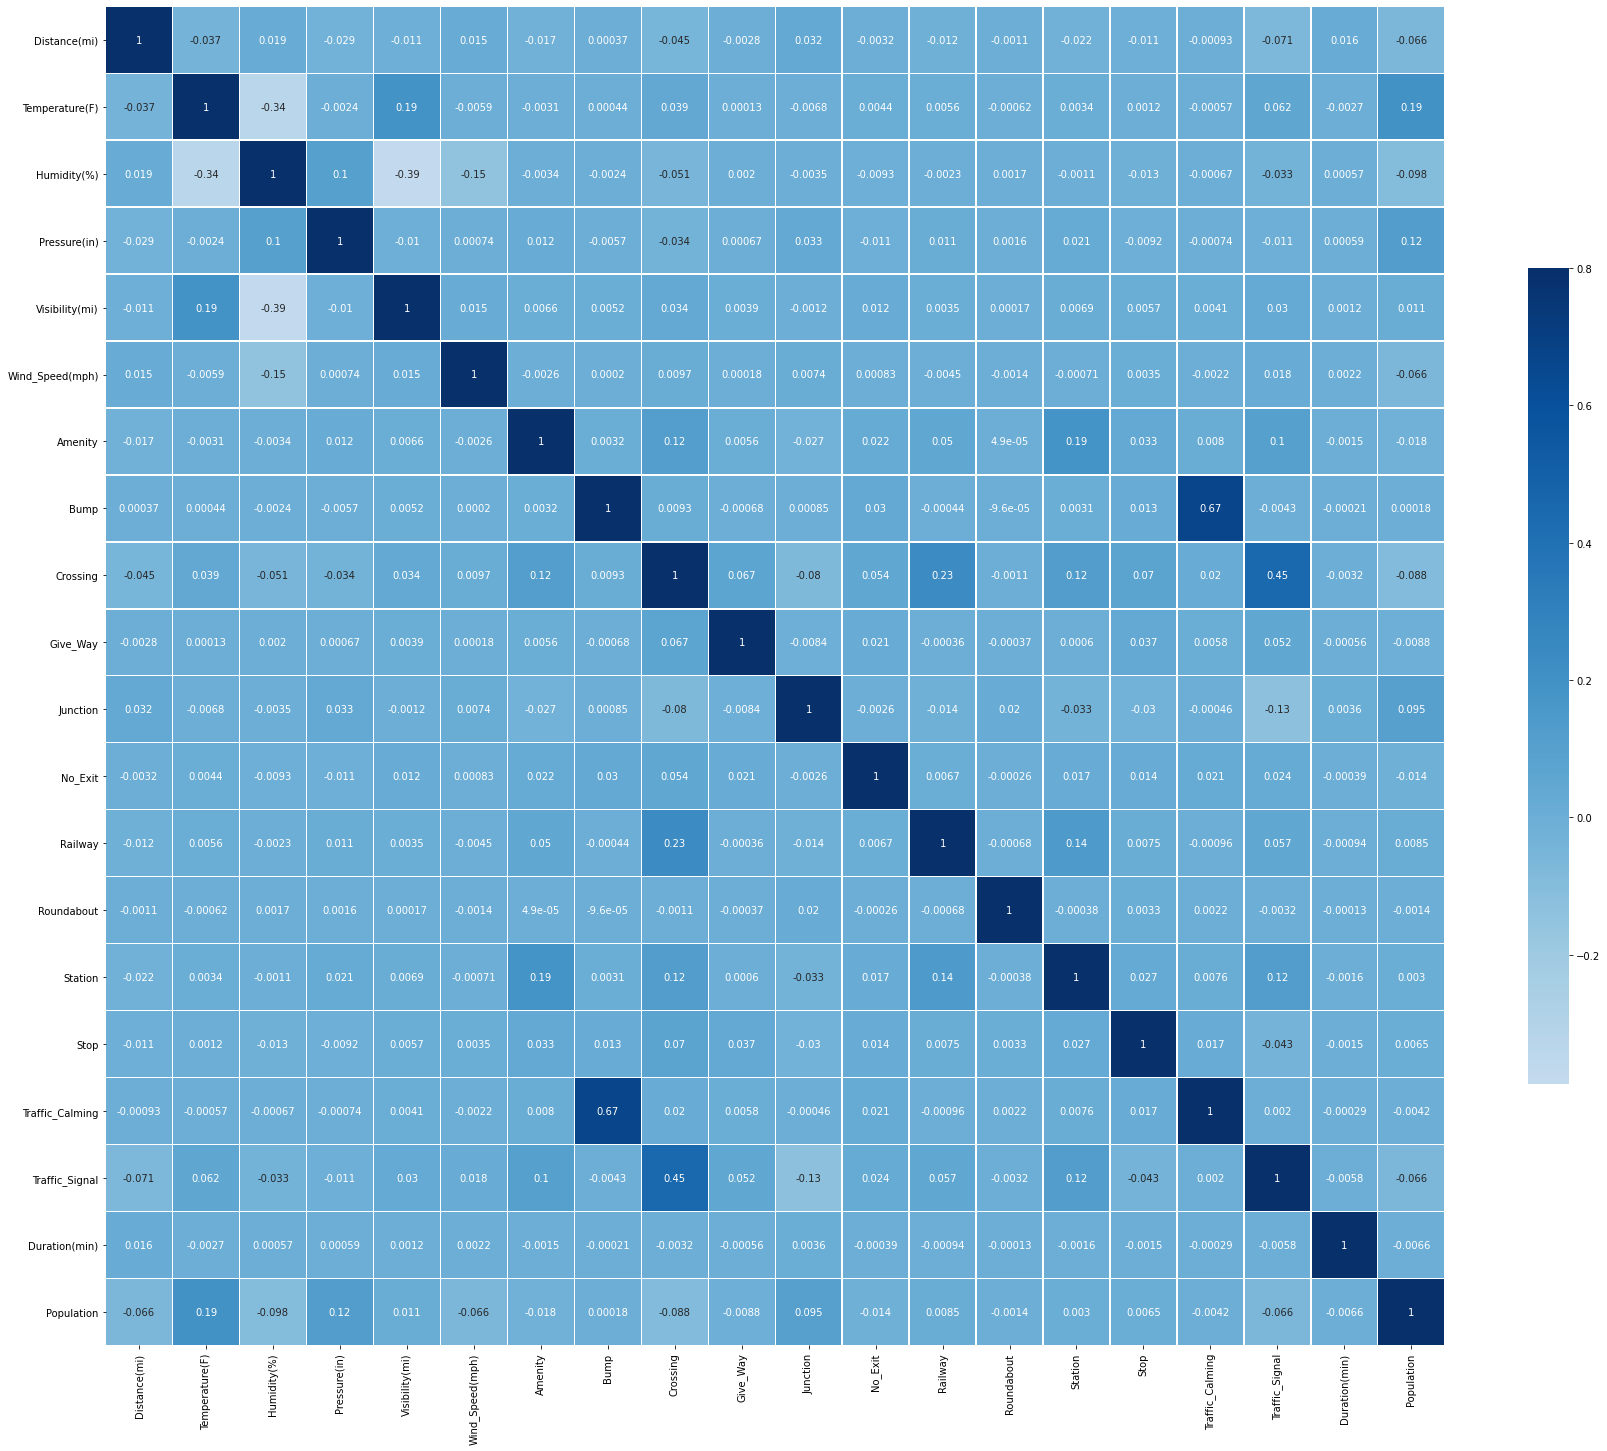

In [ ]:
corr_df=X.corr(method="pearson")
a4_dimens=(30,30)
#a4_dimens=(15.7,10.24)
fig , ax=plt.subplots(figsize=a4_dimens)
sns.heatmap(corr_df,cmap="Blues",vmax=0.8,center=0,
            square=True,linewidths=.3,cbar_kws={'shrink':.5},
            annot=True,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)
plt.xticks(rotation=90)
plt.yticks(rotation=360)

As we can depict from the above correlation matrix that 

Also, we need to check the correlation of our Independent Features with respect to the Dependent Feature/Output Variable. Higher the correlation indicates higher significance of the independent variable in predicting the dependent variable.

In [ ]:
df=dataset

In [ ]:
corrMatrix = dataset.corr(method='pearson')
print (corrMatrix)

                 Distance(mi)  Temperature(F)  ...  Population  Severity
Distance(mi)         1.000000       -0.037171  ...   -0.066177  0.152451
Temperature(F)      -0.037171        1.000000  ...    0.194500 -0.028115
Humidity(%)          0.018541       -0.338943  ...   -0.098147  0.034468
Pressure(in)        -0.028546       -0.002382  ...    0.122377  0.037225
Visibility(mi)      -0.011182        0.192283  ...    0.011441 -0.006926
Wind_Speed(mph)      0.014603       -0.005879  ...   -0.065840  0.035118
Amenity             -0.016619       -0.003142  ...   -0.017981 -0.044505
Bump                 0.000375        0.000443  ...    0.000183 -0.004240
Crossing            -0.045405        0.039470  ...   -0.087705 -0.140072
Give_Way            -0.002789        0.000131  ...   -0.008832 -0.008662
Junction             0.032294       -0.006777  ...    0.095234  0.059484
No_Exit             -0.003208        0.004374  ...   -0.014096 -0.006415
Railway             -0.012054        0.005563  ... 

Now we will remove the feature Visiblity(mi) and Bump after analyzing the correlation coefficients.

In [ ]:
df= df.drop(['Visibility(mi)','Bump'], axis=1)

In [ ]:
dataset=df

In [ ]:
from google.colab import files
df.to_csv('dataset.csv', index=False) 
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Encoding Categorical Variables

In [ ]:
dat = dataset.copy()
dat = pd.get_dummies(dat, columns=['State'], prefix = ['State_'], drop_first=True)

print(dat.head())

   Distance(mi)  Temperature(F)  ...  State__Wisconsin  State__Wyoming
2          0.01            36.0  ...                 0               0
3          0.01            35.1  ...                 0               0
4          0.01            36.0  ...                 0               0
5          0.01            37.9  ...                 0               0
6          0.00            34.0  ...                 0               0

[5 rows x 68 columns]


In [ ]:
dat = pd.get_dummies(dat, columns=['Wind_Direction'], prefix = ['W_Dir_'], drop_first=True)

print(dat.head())

   Distance(mi)  Temperature(F)  Humidity(%)  ...  W_Dir__SW  W_Dir__VAR W_Dir__W
2          0.01            36.0        100.0  ...          1           0        0
3          0.01            35.1         96.0  ...          1           0        0
4          0.01            36.0         89.0  ...          1           0        0
5          0.01            37.9         97.0  ...          0           0        0
6          0.00            34.0        100.0  ...          0           0        1

[5 rows x 76 columns]


In [ ]:
dat = pd.get_dummies(dat, columns=['Weather_Condition'], prefix = ['Weather_'], drop_first=True)

print(dat.head())

   Distance(mi)  Temperature(F)  ...  Weather__thunderstorm  Weather__windy
2          0.01            36.0  ...                      0               0
3          0.01            35.1  ...                      0               0
4          0.01            36.0  ...                      0               0
5          0.01            37.9  ...                      0               0
6          0.00            34.0  ...                      0               0

[5 rows x 82 columns]


Now we will Update our primary dataset that we will use for further training purpose

In [ ]:
dataset= dat

In [ ]:
dataset.head()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Duration(min),Population,Severity,State__Arizona,State__Arkansas,State__California,State__Colorado,State__Connecticut,State__Delaware,State__Florida,State__Georgia,State__Idaho,State__Illinois,State__Indiana,State__Iowa,State__Kansas,State__Kentucky,State__Louisiana,State__Maine,State__Maryland,State__Massachusetts,State__Michigan,State__Minnesota,State__Mississippi,...,State__Nebraska,State__Nevada,State__New Hampshire,State__New Jersey,State__New Mexico,State__New York,State__North Carolina,State__North Dakota,State__Ohio,State__Oklahoma,State__Oregon,State__Pennsylvania,State__Rhode Island,State__South Carolina,State__South Dakota,State__Tennessee,State__Texas,State__Utah,State__Vermont,State__Virginia,State__Washington,State__West Virginia,State__Wisconsin,State__Wyoming,W_Dir__E,W_Dir__N,W_Dir__NE,W_Dir__NW,W_Dir__S,W_Dir__SE,W_Dir__SW,W_Dir__VAR,W_Dir__W,Weather__cloudy,Weather__fog,Weather__rain,Weather__smoke,Weather__snow,Weather__thunderstorm,Weather__windy
2,0.01,36.0,100.0,29.67,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,11664865.25,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,0.01,35.1,96.0,29.64,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0.01,36.0,89.0,29.65,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,11664865.25,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5,0.01,37.9,97.0,29.63,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
6,0.00,34.0,100.0,29.66,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,11664865.25,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


### Splitting the Dataset into Training and Testing set

In [ ]:
# Relocate our output variable(Severity) to the last column
df= dataset
midd = dataset['Severity']
df= df.drop(['Severity'], axis=1)
df = pd.concat([df,midd], axis = 1)

In [ ]:
dataset=df
dataset.tail()

,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Amenity,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Duration(min),Population,State__Arizona,State__Arkansas,State__California,State__Colorado,State__Connecticut,State__Delaware,State__Florida,State__Georgia,State__Idaho,State__Illinois,State__Indiana,State__Iowa,State__Kansas,State__Kentucky,State__Louisiana,State__Maine,State__Maryland,State__Massachusetts,State__Michigan,State__Minnesota,State__Mississippi,State__Missouri,...,State__Nevada,State__New Hampshire,State__New Jersey,State__New Mexico,State__New York,State__North Carolina,State__North Dakota,State__Ohio,State__Oklahoma,State__Oregon,State__Pennsylvania,State__Rhode Island,State__South Carolina,State__South Dakota,State__Tennessee,State__Texas,State__Utah,State__Vermont,State__Virginia,State__Washington,State__West Virginia,State__Wisconsin,State__Wyoming,W_Dir__E,W_Dir__N,W_Dir__NE,W_Dir__NW,W_Dir__S,W_Dir__SE,W_Dir__SW,W_Dir__VAR,W_Dir__W,Weather__cloudy,Weather__fog,Weather__rain,Weather__smoke,Weather__snow,Weather__thunderstorm,Weather__windy,Severity
3508770,0.512,73.0,48.0,26.36,15.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1055696.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.0
3508771,0.000,80.0,31.0,26.01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1055696.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,2.0
3508772,0.000,74.0,40.0,26.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1055696.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0
3508773,0.000,60.0,75.0,26.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,1055696.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.0
3508774,0.000,79.0,40.0,25.54,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,1055696.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0


In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [ ]:
print(X)

[[1.00e-02 3.60e+01 1.00e+02 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.00e-02 3.51e+01 9.60e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.00e-02 3.60e+01 8.90e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [0.00e+00 7.40e+01 4.00e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 6.00e+01 7.50e+01 ... 0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 7.90e+01 4.00e+01 ... 0.00e+00 0.00e+00 0.00e+00]]


In [ ]:
np.unique(Y)

array([1., 2., 3., 4.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)

In [ ]:
X_train

array([[ 0.   , 53.   , 71.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 72.   , 57.   , ...,  0.   ,  0.   ,  0.   ],
       [ 2.061, 68.   , 50.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 43.   , 71.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 62.   , 90.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 33.1  , 75.   , ...,  0.   ,  0.   ,  0.   ]])

### Oversampling using SMOTE

In [ ]:
np.unique(Y)

array([1., 2., 3., 4.])

In [ ]:
from collections import Counter
counter = Counter(Y_train)
print(counter)

Counter({2.0: 1644737, 3.0: 676849, 4.0: 75026, 1.0: 22716})


In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
from collections import Counter
counter = Counter(y_train_res)
print(counter)

Counter({2.0: 1644737, 4.0: 1644737, 3.0: 1644737, 1.0: 1644737})


In [ ]:
p= sns.pairplot(dataset)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_res = sc.fit_transform(x_train_res)
X_test = sc.transform(X_test)

## Model Building

### Artificial Neural Network Model (ANN)

In [ ]:
y_train_res=np.array(y_train_res,dtype=int)
a= y_train_res
np.unique(a)

array([1, 2, 3, 4])

#### Label Encoding of Output Variable

In [ ]:
import sklearn.preprocessing

label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(a)+1))
b = label_binarizer.transform(a)
print('{0}'.format(b))

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


#### Importing the Keras libraries and packages

In [ ]:
import keras
from keras.models import Sequential # package used to build NN models
from keras.layers import Dense # package used to build the NN layers
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout # Used to apply dropout to avoid overfitting
from keras.layers import BatchNormalization

#### Building ANN Architecture

In [ ]:
classifier = Sequential() #Used to initialize the ANN

#Add the input layer and the first hidden layer
classifier.add(Dense(activation= 'relu', units = 32, kernel_initializer='normal', input_dim=81))
classifier.add(Dropout(0.3, input_dim=81))

#Add the second hidden layer
classifier.add(Dense(activation= 'relu',  units= 64, kernel_initializer='normal'))
classifier.add(Dropout(0.2))

#Add the second hidden layer
#classifier.add(Dense(activation= 'relu',  units= 1024, kernel_initializer='normal'))
#classifier.add(Dropout(0.2))

#Add the third hidden layer
#classifier.add(Dense(activation= 'relu',  units= 256, kernel_initializer='normal'))
#classifier.add(Dropout(0.2))

#Add the fourth hidden layer
classifier.add(Dense(activation= 'relu', units= 128, kernel_initializer='normal'))
classifier.add(Dropout(0.3))

#Add the output layer
classifier.add(Dense(units = 5, activation = 'softmax'))

classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                5248      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 645       
Total params: 14,213
Trainable params: 14,213
Non-trainable params: 0
_________________________________________________________________


#### Training ANN Model

Now we will Compile the ANN

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Now we will fit the ANN to the Training set

In [ ]:
model_history=classifier.fit(x_train_res, b,validation_split=0.3, batch_size = 512 , epochs = 150)

Epoch 1/150
8995/8995 [==============================] - 45s 5ms/step - loss: 0.7363 - accuracy: 0.6702 - val_loss: 2.6564 - val_accuracy: 0.1286
Epoch 2/150
8995/8995 [==============================] - 43s 5ms/step - loss: 0.6649 - accuracy: 0.7058 - val_loss: 2.6387 - val_accuracy: 0.1304
Epoch 3/150
8995/8995 [==============================] - 44s 5ms/step - loss: 0.6500 - accuracy: 0.7123 - val_loss: 2.6356 - val_accuracy: 0.1362
Epoch 4/150
8995/8995 [==============================] - 44s 5ms/step - loss: 0.6422 - accuracy: 0.7157 - val_loss: 2.8035 - val_accuracy: 0.1133
Epoch 5/150
8995/8995 [==============================] - 42s 5ms/step - loss: 0.6368 - accuracy: 0.7181 - val_loss: 2.7740 - val_accuracy: 0.1314
Epoch 6/150
8995/8995 [==============================] - 42s 5ms/step - loss: 0.6325 - accuracy: 0.7198 - val_loss: 2.8682 - val_accuracy: 0.1394
Epoch 7/150
8995/8995 [==============================] - 43s 5ms/step - loss: 0.6295 - accuracy: 0.7214 - val_loss: 2.8027 -